<a href="https://colab.research.google.com/github/AzadMehedi/ML-Projects/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
a = np.array([[1,2,3,4,5],[4,5,6,7,8]])
print(a)
a.ndim

[[1 2 3 4 5]
 [4 5 6 7 8]]


2

In [ ]:
# to comvert Matrix to vector or higher order to single dimention, use flatten() method
a.flatten()


array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

# Imags
- Download manually the images from google
- download dataset from kaggle.com
- Build a Image web crawler
- Use python libraries to scrape the images (using)

In [5]:
# instaling bing image downoader for download images
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# creating image folder
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
# download flower images
from bing_image_downloader import downloader
downloader.download('flower', limit=30, output_dir='images', adult_filter_off=True)

In [ ]:
# download bird images
downloader.download('bird', limit=30, output_dir='images', adult_filter_off=True)

In [ ]:
# download ice-creme images
downloader.download('ice-creme', limit=30, output_dir='images', adult_filter_off=True)

In [ ]:
# download cat images
downloader.download('cat', limit=30, output_dir='images', adult_filter_off=True)

In [ ]:
# download dog images
downloader.download('dog', limit=10, output_dir='images', adult_filter_off=True)

# Preprocessing
1. Resize
2. Flatten

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize 





In [43]:
target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['bird','cat','dog','flower','ice-creme']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)   # label encoding the values
  path = os.path.join(DATADIR, category)   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape) # height, width, depth
    # plt.imshow(img_array)    # showing a single image
    img_resized = resize(img_array,(150,150,3))   # resizing images
    flat_data.append(img_resized.flatten())       # flatting images
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images) 

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [44]:
len(flat_data[0])

67500

In [45]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

<BarContainer object of 5 artists>

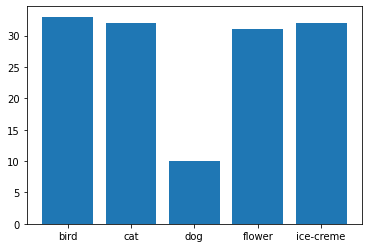

In [46]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

# Split data into trainig and testing

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state=109)  # here output as target


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000], 'kernel':['linear']},
    {'C':[1,10,100,1000], 'gamma':[0.001, 0.0001], 'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [49]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 4,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [50]:
y_test

array([4, 3, 0, 1, 4, 2, 1, 0, 4, 3, 0, 3, 3, 4, 0, 3, 4, 0, 4, 0, 3, 4,
       0, 2, 2, 3, 3, 3, 1, 1, 3, 4, 1, 1, 3, 1, 0, 3, 3, 4, 3, 0])

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
accuracy_score(y_pred, y_test)

0.2619047619047619

In [53]:
confusion_matrix(y_pred, y_test)

array([[ 4,  2,  0,  1,  2],
       [ 5,  5,  3, 13,  5],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2]])

In [54]:
# Save the model using Pickle library
import pickle
pickle.dump(clf, open('img_model.p','wb'))

In [55]:
model= pickle.load(open('img_model.p','rb'))

In [59]:
# tesing a brand new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten)
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

Enter your URLhttps://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.sci.news%2Fbiology%2Fmeratus-flycatcher-white-eye-10508.html&psig=AOvVaw05r2I7ayc065Z4T0zjqn99&ust=1673685212870000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCKCru7iRxPwCFQAAAAAdAAAAABAQ


ValueError: ignored